# Data Science Test Widget Brain.

This assignment focuses on transshipments of a certain port. Each day, many vessels arrive in this port and are served by some stevedore(s). Four cargo types have been identified (ore, coal, oil, and petroleum), and vessels often carry a mixture of cargo types. For each unique vessel arrival (i.e. each row in the data), we would like a prediction of how much it transships (total of load & discharge activities) per cargo type. Variables of interest therefore are: discharge1, load1, discharge2, load2, discharge3, load3, discharge4 and load4. 

The data for this case is stored in ‘VesselData.csv’ and contains historical data. 

We would like you to provide us with a Jupyter notebook or Python script with the results of your endeavors, well enriched with comments elaborating on the steps taken, even if they did not lead you anywhere, and try to motivate your actions as much as possible. We would like to understand the approach you have taken and your line of thought.

Explanation of variables in the data:

| Variable | Explanation   |
|:-----|:-----|
|   eta  | Estimated time of arrival of vessel|
|  ata  | Actual time of arrival of vessel |
|atd	 |           Actual time of departure of vessel |
|vesseldwt|	    Vessel deadweight tonnage|
|vesseltype|	    Vessel type|
|discharge[x]|	Discharge amount of cargo type x|
|load[x]	  |      Load amount of cargo type x|
|stevedorenames|	(Anonymized) stevedore ID’s visited by vessel|
|hasnohamis	   | Boolean whether vessel has the HaMIS notification system|
|earliesteta|	    Estimated time of arrival of first entry to port|
|latesteta	 |   Estimated time of arrival of last entry to port (vessel can spread transshipment(s) over multiple days)|
|traveltype	  |  Travel type|
|previousportid|	ID of previous port|
|nextportid	   | ID of next port|
|isremarkable|	Boolean whether there is anything remarkable regarding the vessel|
|vesselid	  |  Vessel ID|

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

## Data exploration

First of all, let's see how data looks like

In [5]:
df = pd.read_csv("VesselData.csv")
df.head()

eta                     ata                     atd  \
0  2017-09-19 00:00:00+00  2017-09-19 00:00:00+00  2017-09-22 00:00:00+00   
1  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
2  2017-09-30 00:00:00+00  2017-09-30 00:00:00+00  2017-10-01 00:00:00+00   
3  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
4  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00   

   vesseldwt  vesseltype  discharge1  load1  discharge2  load2  discharge3  \
0   109290.0           5           0      0           0      0       90173   
1    67170.0           3           0      0           0      0           0   
2    67737.0           3           0      0           0      0           0   
3    43600.0           3           0      0           0      0           0   
4     9231.0           3           0      0           0      0           0   

   ...  load4  stevedorenames  hasnohamis             earliesteta  \
0  ...      0   Stevedore_104         NaN  2017-09-19 00:00:00+00   
1  ...      0   Stevedore_109         NaN  2017-10-02 00:00:00+00   
2  ...      0    Stevedore_57         NaN  2017-09-30 00:00:00+00   
3  ...      0    Stevedore_57         NaN  2017-10-02 00:00:00+00   
4  ...      0    Stevedore_98         NaN  2017-10-02 00:00:00+00   

                latesteta traveltype previousportid nextportid  isremarkable  \
0  2017-09-19 00:00:00+00    ARRIVAL            981        731             f   
1  2017-10-02 00:00:00+00    ARRIVAL             19         15             f   
2  2017-09-30 00:00:00+00    ARRIVAL             19         19             f   
3  2017-10-02 00:00:00+00    ARRIVAL             15         18             f   
4  2017-10-02 00:00:00+00    ARRIVAL             74         27             f   

   vesselid  
0      2242  
1      5462  
2      5251  
3      5268  
4      5504  

[5 rows x 22 columns]

First of all, let's check for unique values of vesselid or multiple entries (this is expected from data description)

In [6]:
df.shape

(8208, 22)

In [7]:
df.vesselid.nunique()

3022

In [9]:
df.groupby('vesselid').size().describe() #this is to get a compact overview of vessel id. 

count    3022.000000
mean        2.716082
std         5.070584
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        98.000000
dtype: float64

In [10]:
df.describe()

vesseldwt   vesseltype     discharge1         load1     discharge2  \
count    8206.000000  8208.000000    8208.000000   8208.000000    8208.000000   
mean    37929.072630     3.593811    1732.712841     60.754386    1168.698221   
std     51742.798795     0.987787   16297.994648   1325.463945   11331.135301   
min       624.000000     1.000000       0.000000      0.000000       0.000000   
25%      6600.000000     3.000000       0.000000      0.000000       0.000000   
50%     13031.000000     3.000000       0.000000      0.000000       0.000000   
75%     46600.000000     5.000000       0.000000      0.000000       0.000000   
max    320805.000000     5.000000  204304.000000  41761.000000  189933.000000   

              load2     discharge3          load3     discharge4  \
count   8208.000000    8208.000000    8208.000000    8208.000000   
mean      19.387549    4791.331871      44.745492    1820.782407   
std      665.333248   25366.035772    3071.717973   10034.936858   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       0.000000       0.000000   
75%        0.000000       0.000000       0.000000       0.000000   
max    43639.000000  299647.000000  271251.000000  183837.000000   

               load4  hasnohamis  previousportid   nextportid     vesselid  
count    8208.000000         0.0     8208.000000  8208.000000  8208.000000  
mean     1509.046784         NaN      367.102461   379.989035  4336.194688  
std     11936.519585         NaN      417.216981   421.691921  1692.321323  
min         0.000000         NaN        2.000000     2.000000     2.000000  
25%         0.000000         NaN       31.000000    25.000000  3238.000000  
50%         0.000000         NaN      126.000000   127.000000  4684.000000  
75%         0.000000         NaN      666.000000   766.000000  5399.250000  
max    293449.000000         NaN     1915.000000  1914.000000  7486.000000

Target columns are discharge* and load* and seem to be quite sparse

In [12]:
df.isnull().sum()

eta                  0
ata                  0
atd                  0
vesseldwt            2
vesseltype           0
discharge1           0
load1                0
discharge2           0
load2                0
discharge3           0
load3                0
discharge4           0
load4                0
stevedorenames       2
hasnohamis        8208
earliesteta          0
latesteta            0
traveltype           0
previousportid       0
nextportid           0
isremarkable         0
vesselid             0
dtype: int64

In [14]:
df.hasnohamis.isna().sum()

8208

In [15]:
df.hasnohamis.nunique() 

0

We just noticed that hasnohamis is all made of NaNs, so we drop the column

In [17]:
df.drop('hasnohamis', axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 21 columns):
eta               8208 non-null object
ata               8208 non-null object
atd               8208 non-null object
vesseldwt         8206 non-null float64
vesseltype        8208 non-null int64
discharge1        8208 non-null int64
load1             8208 non-null int64
discharge2        8208 non-null int64
load2             8208 non-null int64
discharge3        8208 non-null int64
load3             8208 non-null int64
discharge4        8208 non-null int64
load4             8208 non-null int64
stevedorenames    8206 non-null object
earliesteta       8208 non-null object
latesteta         8208 non-null object
traveltype        8208 non-null object
previousportid    8208 non-null int64
nextportid        8208 non-null int64
isremarkable      8208 non-null object
vesselid          8208 non-null int64
dtypes: float64(1), int64(12), object(8)
memory usage: 1.3+ MB


From here we can see a bunch of things:
1. target variables are numbers and that's okay, probably would make sense to allow for floats in prediction as it would come closer to their values, but should be handled automatically by score method
2. previous and next port ids are encoded as numbers but we will want them to be treated as categoricals
3. we have 2 missing entries in vesseldwt amd two in stevedorenames.
We can probably impute dwt from vesselid, whereas stevedorenames imputation would be more uncertain. We just drop those two rows for the stevedore, at the moment.

Previously we could also see that isremarkable is probably a binary feature (f = false, t = true, possibly nans, we need to check)

In [20]:
df = df[pd.notnull(df['stevedorenames'])]

In [21]:
df.info() # from here we see that the two vesseldtw are still missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206 entries, 0 to 8207
Data columns (total 21 columns):
eta               8206 non-null object
ata               8206 non-null object
atd               8206 non-null object
vesseldwt         8204 non-null float64
vesseltype        8206 non-null int64
discharge1        8206 non-null int64
load1             8206 non-null int64
discharge2        8206 non-null int64
load2             8206 non-null int64
discharge3        8206 non-null int64
load3             8206 non-null int64
discharge4        8206 non-null int64
load4             8206 non-null int64
stevedorenames    8206 non-null object
earliesteta       8206 non-null object
latesteta         8206 non-null object
traveltype        8206 non-null object
previousportid    8206 non-null int64
nextportid        8206 non-null int64
isremarkable      8206 non-null object
vesselid          8206 non-null int64
dtypes: float64(1), int64(12), object(8)
memory usage: 1.4+ MB


In [22]:
df['vesseldwt'].fillna(df.groupby('vesselid')['vesseldwt'].transform("median"), inplace=True)
# we imputed the two values

C:\Users\ironb\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
df['isremarkable'].value_counts() 

f    8206
Name: isremarkable, dtype: int64

In [25]:
# no remarkable ships here --> dropping
df.drop('isremarkable', axis = 1, inplace = True)

C:\Users\ironb\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
df.head()

eta                     ata                     atd  \
0  2017-09-19 00:00:00+00  2017-09-19 00:00:00+00  2017-09-22 00:00:00+00   
1  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
2  2017-09-30 00:00:00+00  2017-09-30 00:00:00+00  2017-10-01 00:00:00+00   
3  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
4  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00   

   vesseldwt  vesseltype  discharge1  load1  discharge2  load2  discharge3  \
0   109290.0           5           0      0           0      0       90173   
1    67170.0           3           0      0           0      0           0   
2    67737.0           3           0      0           0      0           0   
3    43600.0           3           0      0           0      0           0   
4     9231.0           3           0      0           0      0           0   

   load3  discharge4  load4 stevedorenames             earliesteta  \
0      0           0      0  Stevedore_104  2017-09-19 00:00:00+00   
1      0           0      0  Stevedore_109  2017-10-02 00:00:00+00   
2      0           0      0   Stevedore_57  2017-09-30 00:00:00+00   
3      0           0      0   Stevedore_57  2017-10-02 00:00:00+00   
4      0           0      0   Stevedore_98  2017-10-02 00:00:00+00   

                latesteta traveltype  previousportid  nextportid  vesselid  
0  2017-09-19 00:00:00+00    ARRIVAL             981         731      2242  
1  2017-10-02 00:00:00+00    ARRIVAL              19          15      5462  
2  2017-09-30 00:00:00+00    ARRIVAL              19          19      5251  
3  2017-10-02 00:00:00+00    ARRIVAL              15          18      5268  
4  2017-10-02 00:00:00+00    ARRIVAL              74          27      5504

Now, before splitting features and targets, and going over to prediction, let's think about features for a moment.

eta, ata, atd, earliesteta, latesteta all might contribute to loading/unloading. eta because the port knows the ship is incoming so it's ready. therefore a big difference ata-eta (ship is late) might contribute to longer permanence and while total load/unload is likely to not change (they can't keep stuff onboard or not ship something paid for, probably). atd could depend on a number of factors. earliest and latest eta might result in an increased number of port entries and that would be reflected in the same vessel going from previousport to the same nextport. you can see this even in the header. This is quite a lot to test/display for in the short time at my disposal, so we'll keep it for more refined analysis.

stevedorenames: some might be faster than others, but all probably within a range of acceptability

vesseldwt depends on the vesselid + all what's onboard so it's quite important. one could look for minimum(vesseltype) for each vesselid, when only loading occours and probably estimate lightweight tonnage for the vessel and only get estimate of shipment weight onboard by subtracting. As this is probably not available for all ships (remember vesselid distribution) it's not useful now.

vesseltype (categorical) might influence more strongly that, as it encodes info on lightweight for vessel class.

In [29]:
sns.distplot(df['vesselid'].value_counts(), kde=False)
plt.title("Distribution of vesselid entries")

Text(0.5, 1.0, 'Distribution of vesselid entries')

Text(0.5, 1.0, 'Distribution of traveltypes')

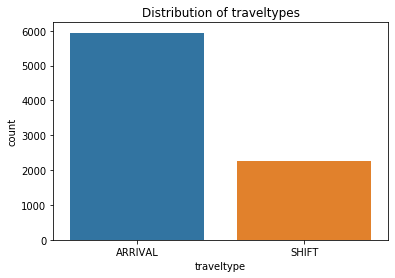

In [35]:
sns.countplot(data = df, x = "traveltype")
plt.title("Distribution of traveltypes")

The classes (traveltypes and also how often a ship appears in port) are quite imbalanced!

It's also important to have an idea of the dwt and vessel class

Text(0.5, 1.0, 'Distribution of vesseldwt')

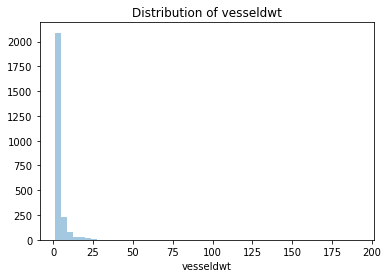

In [38]:
sns.distplot(df['vesseldwt'].value_counts(), kde=False)
plt.title("Distribution of vesseldwt")

One could stratify it by vesseltype and/or vesselid but it's a more refined analysis 

Text(0.5, 1.0, 'Distribution of vessel types')

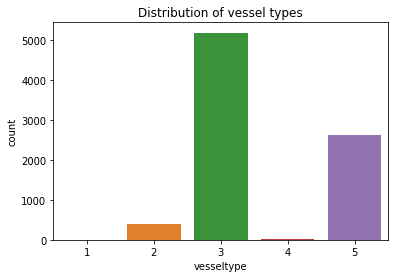

In [39]:
sns.countplot(data = df, x = "vesseltype")
plt.title("Distribution of vessel types")

In [42]:
df.vesseltype.value_counts()

3    5174
5    2621
2     386
4      23
1       2
Name: vesseltype, dtype: int64

This is a very imbalanced feature, and it might lead to confusion in the prediction.
Now, it's most likely ordinal, and one would hope that a ship of class 5 is bigger than of class 4, but let's check this. 
We could have very few super-big ships and many, cheaper (?), smaller vessels (that can enter many more ports), or a lot of big ships which could be cost-effective (more efficient to transport big bulks). As I don't know anything about shipping, let's check.

In [45]:
df.groupby('vesseltype')['vesseldwt'].describe()

count          mean            std     min       25%      50%  \
vesseltype                                                                   
1              2.0  99984.000000  129689.040524  8280.0  54132.00  99984.0   
2            386.0  94746.735751   60169.919711  4119.0  53590.25  80536.0   
3           5174.0  33590.402203   48211.492990   624.0   7071.00  11424.0   
4             23.0  58623.956522   45699.899685  5320.0  12344.00  75485.0   
5           2621.0  37850.330408   52130.118732  1263.0   5757.00  16587.0   

                  75%       max  
vesseltype                       
1           145836.00  191688.0  
2           175960.25  209756.0  
3            33156.50  202461.0  
4            94884.50  122052.0  
5            45923.00  320805.0

Oh look, it turns out that indeed there are a couple of mega ships and many more smaller. class 3 is a bit strange if compared to class 5. Variability is similar and sample size, although double, is comparable. class 5 definetely appears to be bigger. So we remap vesseltype to an ordered list, from smaller to bigger ships.
When looking at max values, there's a different order, but when looking at the bulk of the distribution, this ordering makes sense

In [46]:
dict_vesseltype = {1: 5, 2: 4, 3: 1, 4: 3, 5: 2}
df['vesseltype'].replace(dict_vesseltype, inplace=True)

In [47]:
df.groupby('vesseltype')['vesseldwt'].describe()

count          mean            std     min       25%      50%  \
vesseltype                                                                   
1           5174.0  33590.402203   48211.492990   624.0   7071.00  11424.0   
2           2621.0  37850.330408   52130.118732  1263.0   5757.00  16587.0   
3             23.0  58623.956522   45699.899685  5320.0  12344.00  75485.0   
4            386.0  94746.735751   60169.919711  4119.0  53590.25  80536.0   
5              2.0  99984.000000  129689.040524  8280.0  54132.00  99984.0   

                  75%       max  
vesseltype                       
1            33156.50  202461.0  
2            45923.00  320805.0  
3            94884.50  122052.0  
4           175960.25  209756.0  
5           145836.00  191688.0

## Now let's take a look also at target variables

In [53]:
target_df = df.iloc[:,5:13]
targets = target_df.columns.values


In [54]:
print(targets)

['discharge1' 'load1' 'discharge2' 'load2' 'discharge3' 'load3'
 'discharge4' 'load4']


In [55]:
for target in targets: 
    sns.distplot(df[target].value_counts(), kde=False)
    plt.title("Distribution of " + df[target].name)

previous plots needs to be separated but nevertheless we understand the meaning. as it's late, let's move to prediction


In [56]:
# drop target features from df

In [57]:
X = df.drop(targets, axis = 1)
X.head()

eta                     ata                     atd  \
0  2017-09-19 00:00:00+00  2017-09-19 00:00:00+00  2017-09-22 00:00:00+00   
1  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
2  2017-09-30 00:00:00+00  2017-09-30 00:00:00+00  2017-10-01 00:00:00+00   
3  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-03 00:00:00+00   
4  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00  2017-10-02 00:00:00+00   

   vesseldwt  vesseltype stevedorenames             earliesteta  \
0   109290.0           2  Stevedore_104  2017-09-19 00:00:00+00   
1    67170.0           1  Stevedore_109  2017-10-02 00:00:00+00   
2    67737.0           1   Stevedore_57  2017-09-30 00:00:00+00   
3    43600.0           1   Stevedore_57  2017-10-02 00:00:00+00   
4     9231.0           1   Stevedore_98  2017-10-02 00:00:00+00   

                latesteta traveltype  previousportid  nextportid  vesselid  
0  2017-09-19 00:00:00+00    ARRIVAL             981         731      2242  
1  2017-10-02 00:00:00+00    ARRIVAL              19          15      5462  
2  2017-09-30 00:00:00+00    ARRIVAL              19          19      5251  
3  2017-10-02 00:00:00+00    ARRIVAL              15          18      5268  
4  2017-10-02 00:00:00+00    ARRIVAL              74          27      5504

## Brief description of what I'd do (not sure I can make it on time)
1. encode categorical variables such as traveltype (dummy or one-hot encoding); 
2. dropping columns where encoding would result in too many additional columns (e.g. if we have 50 unique values, it doesn't make sense to get such a matrix);
3. encode times as such. on a more refined analysis, build columns like time in port by subtracting relevant columns;
4. at minimum, keep times, traveltype, vesseldtw, vesseltype. Port info and vessel if encoding in okay.
5. split dataset in train test (probably with 15% size, as we have many entries). In a second moment, refine it with stratification over imbalanced classes;
6. over the train set, do a cross-validation (somewhere between 5 and 10 -fold). test set only for final scoring (if time is available);
7. before any prediction, standardize numeric feature (StandardScaler), keeping separate each train/validation/test sets, to avoid data leakage; 
8. On more refined analysis, there could be data leakage in vesseldwt: for instance if vessel x enters port at day d1 with tonnage z1, and then waits outside and re-enters a couple of days later, tonnage at day d2 will depend on target variables (load/unload) of day d1
9. train and predict
10. try to see a bunch of bad predictions cases to see if there's any insight in improvements

### How to choose the classifier
We have multiple prediction targets, so at first I would just treat the problem as 8 individual problems.

It's also to keep in mind that having the load/unload data, when having successive port entries (not necessarily in the same one), allows us to check whether the dwt_difference between successive entries = net load/unload. This is to say that there could be a relationship between target features, via the vesseldwt, which could either be useful or be a sort of leakage to keep in mind.

Since the distributions of target variables is highly skewed towards small values, even if we get a good prediction score, we might find that the classifier prefers to predict low values, as it optimizes the overall score. Resampling and stratified cross-validation might help with that.




At first, I'd start with (linear) regression models and RandomForest. Probably checking by scatterplots or categorical plots any further relationships between columns could guide the model choice. For instance, there might be cycles in the loading/unloading, so one could see that with a certain periodicity (from ata) the ship would unload, and with a different periodicity (or just a delay / additional phase) it would load, thus guiding the prediction on the target variables.